Safety Net
---
Test pull - GeoapI

In [89]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
from matplotlib.patches import Polygon
import requests
import numpy as np
import json
import requests

# Import API key
from api_keys import geoapify_key


In [90]:
sf_orig_clean = Path("SF_Crime_Data_from_2018_to_Present.csv")
sf_orig_df = pd.read_csv(sf_orig_clean)
sf_orig_df


,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,Point,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Current Supervisor Districts,Current Police Districts
0,10/13/2023 23:50,10/13/2023,11:50:00 PM,2023,Friday,10/13/2023 23:50,1.330000e+11,1327919,230729452,232853587.0,...,Bayview,Bayview Hunters Point,10.0,37.721600,-122.390745,POINT (-122.39074534279013 37.72159985216247),NaN,NaN,9.0,2.0
1,10/13/2023 23:50,10/13/2023,11:50:00 PM,2023,Friday,10/13/2023 23:50,1.330000e+11,1327919,230729452,232853587.0,...,Bayview,Bayview Hunters Point,10.0,37.721600,-122.390745,POINT (-122.39074534279013 37.72159985216247),NaN,NaN,9.0,2.0
2,10/13/2023 20:40,10/13/2023,8:40:00 PM,2023,Friday,10/13/2023 20:49,1.330000e+11,1328218,230736946,232863345.0,...,Southern,South of Market,6.0,37.773769,-122.411610,POINT (-122.41161011784295 37.773769345456756),1.0,1.0,10.0,1.0
3,10/13/2023 20:40,10/13/2023,8:40:00 PM,2023,Friday,10/13/2023 20:49,1.330000e+11,1328218,230736946,232863345.0,...,Southern,South of Market,6.0,37.773769,-122.411610,POINT (-122.41161011784295 37.773769345456756),1.0,1.0,10.0,1.0
4,10/13/2023 20:37,10/13/2023,8:37:00 PM,2023,Friday,10/13/2023 20:49,1.330000e+11,1328221,230736924,232863318.0,...,Bayview,Bayview Hunters Point,10.0,37.729543,-122.386419,POINT (-122.38641847685011 37.72954271057539),NaN,NaN,9.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783433,1/1/2018 0:00,1/1/2018,12:00:00 AM,2018,Monday,11/20/2020 14:21,9.803191e+10,980319,200701703,203251939.0,...,Northern,Marina,2.0,37.803727,-122.428400,POINT (-122.42840027589088 37.80372712877811),NaN,NaN,6.0,4.0
783434,1/1/2018 0:00,1/1/2018,12:00:00 AM,2018,Monday,1/23/2021 12:45,9.987897e+10,998789,210051968,210231480.0,...,Out of SF,Bayview Hunters Point,10.0,37.729910,-122.397177,POINT (-122.39717687851248 37.72990988256753),NaN,NaN,9.0,2.0
783435,1/1/2018 0:00,1/1/2018,12:00:00 AM,2018,Monday,5/28/2021 12:57,1.030000e+11,1034762,210329436,211481637.0,...,Taraval,Oceanview/Merced/Ingleside,11.0,37.721659,-122.467615,POINT (-122.46761532399763 37.72165880704187),NaN,NaN,1.0,10.0
783436,1/1/2018 0:00,1/1/2018,12:00:00 AM,2018,Monday,5/4/2021 18:13,1.030000e+11,1030988,216055213,NaN,...,Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
#count total number of neighborhoods:
sf_orig_df['Analysis Neighborhood'].nunique()

41

In [92]:
#group by 1 variable
#counting total number of incidents by neighborhood
sf_by_neighborhood_ct=pd.DataFrame(sf_orig_df.groupby('Analysis Neighborhood').count())
sf_by_neighborhood_ct


,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Intersection,Police District,Supervisor District,Latitude,Longitude,Point,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Current Supervisor Districts,Current Police Districts
Analysis Neighborhood,,,,,,,,,,,,,,,,,,,,,
Bayview Hunters Point,49477,49477,49477,49477,49477,49477,49477,49477,49477,46116,...,49477,49477,49477,49477,49477,49477,0,0,49477,49477
Bernal Heights,13994,13994,13994,13994,13994,13994,13994,13994,13994,12188,...,13994,13994,13994,13994,13994,13994,0,1742,13994,13994
Castro/Upper Market,21425,21425,21425,21425,21425,21425,21425,21425,21425,16877,...,21425,21425,21425,21425,21425,21425,0,17549,21425,21425
Chinatown,13776,13776,13776,13776,13776,13776,13776,13776,13776,11756,...,13776,13776,13776,13776,13776,13776,0,0,13776,13776
Excelsior,12760,12760,12760,12760,12760,12760,12760,12760,12760,11639,...,12760,12760,12723,12760,12760,12760,0,0,12723,12723
Financial District/South Beach,59073,59073,59073,59073,59073,59073,59073,59073,59073,45120,...,59073,59073,59073,59073,59073,59073,0,3297,59073,59073
Glen Park,4213,4213,4213,4213,4213,4213,4213,4213,4213,3426,...,4213,4213,4213,4213,4213,4213,0,0,4213,4213
Golden Gate Park,7882,7882,7882,7882,7882,7882,7882,7882,7882,5982,...,7882,7882,7882,7882,7882,7882,0,0,7882,7882
Haight Ashbury,12274,12274,12274,12274,12274,12274,12274,12274,12274,9297,...,12274,12274,12274,12274,12274,12274,0,435,12274,12274


In [93]:
#grouping total number of incidents per year
sf_by_year_ct= pd.DataFrame(sf_orig_df.groupby('Analysis Neighborhood').count())
df_sort=sf_by_year_ct.sort_values('Incident Datetime',ascending = True)[['Incident Datetime','Incident Year']][:15]
df_sort

,Incident Datetime,Incident Year
Analysis Neighborhood,,
McLaren Park,940,940
Seacliff,1049,1049
Lincoln Park,1246,1246
Presidio,1610,1610
Treasure Island,2676,2676
Twin Peaks,3818,3818
Glen Park,4213,4213
Presidio Heights,4838,4838
Japantown,7743,7743


In [94]:
#group by 2variables
#counting total number of incidents by neighborhood, by year
sf_neigh_yr = pd.DataFrame(sf_orig_df.groupby(['Analysis Neighborhood','Incident Year']).count())
new= sf_orig_df.sort_values(by = ['Analysis Neighborhood','Incident Year'])
df_index=sf_neigh_yr.reset_index()
df=df_index.set_index('Incident Year')
df

,Analysis Neighborhood,Incident Datetime,Incident Date,Incident Time,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Intersection,Police District,Supervisor District,Latitude,Longitude,Point,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Current Supervisor Districts,Current Police Districts
Incident Year,,,,,,,,,,,,,,,,,,,,,
2018,Bayview Hunters Point,7996,7996,7996,7996,7996,7996,7996,7996,7325,...,7996,7996,7996,7996,7996,7996,0,0,7996,7996
2019,Bayview Hunters Point,8148,8148,8148,8148,8148,8148,8148,8148,7475,...,8148,8148,8148,8148,8148,8148,0,0,8148,8148
2020,Bayview Hunters Point,7983,7983,7983,7983,7983,7983,7983,7983,7504,...,7983,7983,7983,7983,7983,7983,0,0,7983,7983
2021,Bayview Hunters Point,9111,9111,9111,9111,9111,9111,9111,9111,8604,...,9111,9111,9111,9111,9111,9111,0,0,9111,9111
2022,Bayview Hunters Point,9034,9034,9034,9034,9034,9034,9034,9034,8439,...,9034,9034,9034,9034,9034,9034,0,0,9034,9034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,Western Addition,4772,4772,4772,4772,4772,4772,4772,4772,3568,...,4772,4772,4772,4772,4772,4772,862,591,4772,4772
2020,Western Addition,3713,3713,3713,3713,3713,3713,3713,3713,3010,...,3713,3713,3713,3713,3713,3713,606,416,3713,3713
2021,Western Addition,3581,3581,3581,3581,3581,3581,3581,3581,2917,...,3581,3581,3581,3581,3581,3581,427,297,3581,3581


In [233]:
#grouping total number of incidents per year per neighborhood
sf_by_year_ct= pd.DataFrame(sf_orig_df.groupby('Analysis Neighborhood').count())
sf_by_year_ct.sort_values('Incident Datetime',ascending = False)
sf_by_year_ct

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Police District,Supervisor District,Latitude,Longitude,Point,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Current Supervisor Districts,Current Police Districts,New Incident Code
Analysis Neighborhood,,,,,,,,,,,,,,,,,,,,,
Bayview Hunters Point,49477,49477,49477,49477,49477,49477,49477,49477,49477,46116,...,49477,49477,49477,49477,49477,0,0,49477,49477,49477
Bernal Heights,13994,13994,13994,13994,13994,13994,13994,13994,13994,12188,...,13994,13994,13994,13994,13994,0,1742,13994,13994,13994
Castro/Upper Market,21425,21425,21425,21425,21425,21425,21425,21425,21425,16877,...,21425,21425,21425,21425,21425,0,17549,21425,21425,21425
Chinatown,13776,13776,13776,13776,13776,13776,13776,13776,13776,11756,...,13776,13776,13776,13776,13776,0,0,13776,13776,13776
Excelsior,12760,12760,12760,12760,12760,12760,12760,12760,12760,11639,...,12760,12723,12760,12760,12760,0,0,12723,12723,12760
Financial District/South Beach,59073,59073,59073,59073,59073,59073,59073,59073,59073,45120,...,59073,59073,59073,59073,59073,0,3297,59073,59073,59073
Glen Park,4213,4213,4213,4213,4213,4213,4213,4213,4213,3426,...,4213,4213,4213,4213,4213,0,0,4213,4213,4213
Golden Gate Park,7882,7882,7882,7882,7882,7882,7882,7882,7882,5982,...,7882,7882,7882,7882,7882,0,0,7882,7882,7882
Haight Ashbury,12274,12274,12274,12274,12274,12274,12274,12274,12274,9297,...,12274,12274,12274,12274,12274,0,435,12274,12274,12274


In [234]:
df_sort.index

Index(['McLaren Park', 'Seacliff', 'Lincoln Park', 'Presidio',
       'Treasure Island', 'Twin Peaks', 'Glen Park', 'Presidio Heights',
       'Japantown', 'Golden Gate Park', 'Oceanview/Merced/Ingleside',
       'Noe Valley', 'Visitacion Valley', 'Portola', 'Lone Mountain/USF'],
      dtype='object', name='Analysis Neighborhood')

In [235]:
#grouping total number of incidents per year
sf_by_year_ct= pd.DataFrame(sf_orig_df.groupby('Analysis Neighborhood').count())
df_sort=sf_by_year_ct.sort_values('Incident Datetime',ascending = True)[['Incident Datetime','Incident Year']][:15]
df_sort

,Incident Datetime,Incident Year
Analysis Neighborhood,,
McLaren Park,940,940
Seacliff,1049,1049
Lincoln Park,1246,1246
Presidio,1610,1610
Treasure Island,2676,2676
Twin Peaks,3818,3818
Glen Park,4213,4213
Presidio Heights,4838,4838
Japantown,7743,7743


The top five safest neighborhoods (with lowest crime incident count) are:['McLaren Park', 'Seacliff', 'Lincoln Park', 'Presidio', 'Treasure Island']


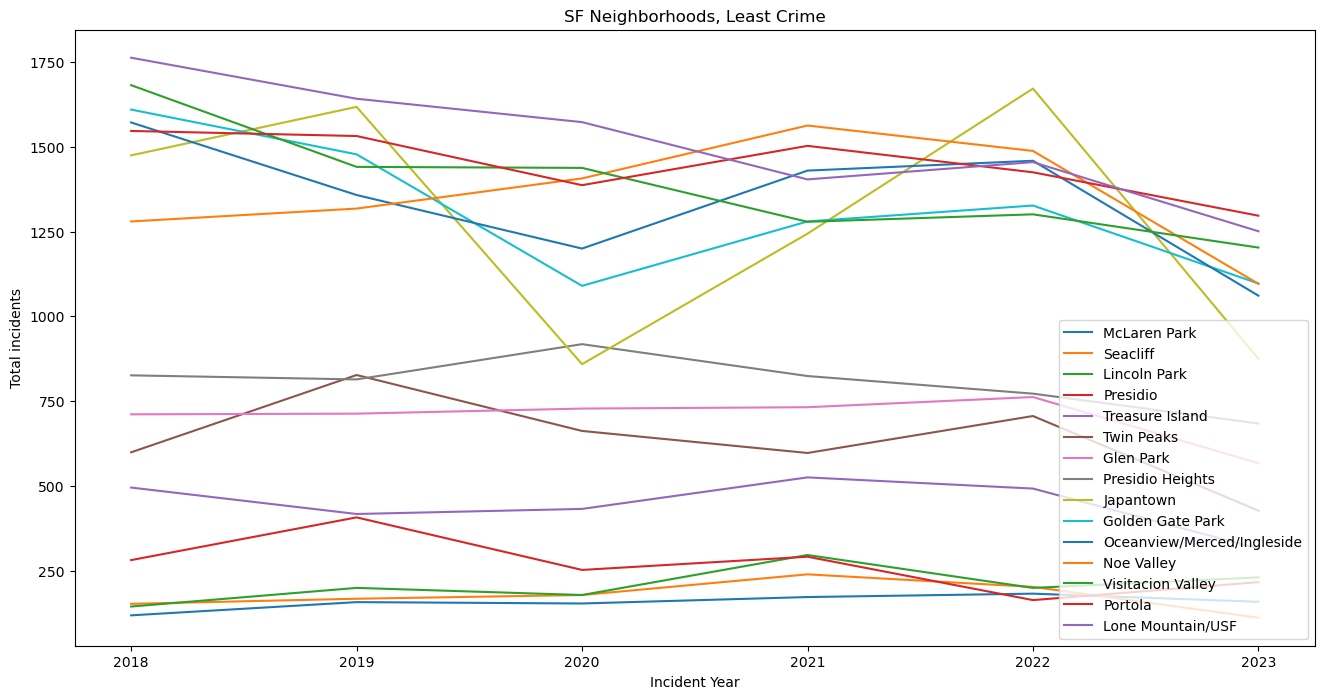

In [236]:
count =0
top_five=[]
for neigh in df_sort.index:
    
    df[df['Analysis Neighborhood']==neigh].Latitude.plot(figsize=[16,8], 
        title='SF Neighborhoods, Least Crime')
    plt.ylabel('Total incidents')
    plt.legend(df_sort.index,loc='lower right')
    if neigh <= neigh:
        count=count+1
        if count <= 5: 
            top_five.append(neigh)
print(f'The top five safest neighborhoods (with lowest crime incident count) are:{top_five}')

In [237]:
# # SafeNet Crime Data Analysis (San Francisco)
# -Crime Trends Over Time - create series plots or histograms to visualize trends, seasonal patterns
# -Crime by Geographic Location - explore how crimes are distributed across different polic areas
# -Crime Types and Severity - 
# -Demographic Analysis
# -Time of Day Analysis
# -Weapon Usage
# -Crime Clearance Rates
# -Crime Correlations - types of crime (ex: crm code)
# -Create spatial analysis (Hotspot Analysis)
# -Crime Trends During Special Events
# -Comparative Analysis with SF Crime Data

In [238]:
crimedata_headers = sf_orig_df.columns.tolist()
crimedata_headers

['Incident Datetime',
 'Incident Date',
 'Incident Time',
 'Incident Year',
 'Incident Day of Week',
 'Report Datetime',
 'Row ID',
 'Incident ID',
 'Incident Number',
 'CAD Number',
 'Report Type Code',
 'Report Type Description',
 'Incident Code',
 'Incident Category',
 'Incident Subcategory',
 'Incident Description',
 'Resolution',
 'Intersection',
 'Police District',
 'Analysis Neighborhood',
 'Supervisor District',
 'Latitude',
 'Longitude',
 'Point',
 'Civic Center Harm Reduction Project Boundary',
 'HSOC Zones as of 2018-06-05',
 'Current Supervisor Districts',
 'Current Police Districts',
 'New Incident Code']

In [239]:
unique_crime_codes = unique_crime_codes = sf_orig_df["Incident Code"].unique()
unique_crime_description = sf_orig_df["Incident Description"].unique()

#Create a list of tuples, each will contain crime code and its description
unique_crime_tp = [(code, desc) for code, desc in zip(unique_crime_codes, unique_crime_description)]

#Sort the list
unique_crime_tp_sorted = sorted(unique_crime_tp, key=lambda x: x[0])

#Unpack the sorted list
unique_crime_codes_sorted, unique_crime_descrioption_sorted = zip(*unique_crime_tp_sorted)

unique_codes_sorted = pd.DataFrame({
    "Incident Code": unique_crime_codes_sorted,
    "Incident Description": unique_crime_descrioption_sorted
 
})
print(len(unique_codes_sorted))
unique_codes_sorted.head(50)["Incident Code"].unique()
unique_crime_description = sf_orig_df["Incident Description"].unique()

#Create a list of tuples, each will contain crime code and its description
unique_crime_tp = [(code, desc) for code, desc in zip(unique_crime_codes, unique_crime_description)]

#Sort the list
unique_crime_tp_sorted = sorted(unique_crime_tp, key=lambda x: x[0])

#Unpack the sorted list
unique_crime_codes_sorted, unique_crime_descrioption_sorted = zip(*unique_crime_tp_sorted)

unique_codes_sorted = pd.DataFrame({
    "Incident Code": unique_crime_codes_sorted,
    "Incident Description": unique_crime_descrioption_sorted
 
})
print(len(unique_codes_sorted))
unique_codes_sorted.head(50)

840
840


,Incident Code,Incident Description
0,1000,"Weapon, Concealed, Loitering While Carrying"
1,1001,"Cloned Cellular Phone, Use"
2,1002,Suicide By Asphyxiation
3,1003,"Rape, Assault To, W/ Gun"
4,1004,Wearing Mask or Disguise for Unlawful Purpose
5,1005,Kidnapping for Ransom or Extortion
6,1007,"Stolen Access Card, Possession"
7,1062,Loitering for Purpose of Prostitution
8,1133,"Vehicle, Seizure Order"
9,1160,Post Release Community Supervision


In [240]:
#Write the sorted result to .csv file for further analysis
unique_codes_sorted.to_csv("unique_codes_sorted.csv", index=False)  #Total of 841 records

In [241]:
#Grouping the keywords in the SF Incident Desciption as Violent Crime
violent_crime_keywords = ["suicide","assault","rape", "homicide", "shooting", "incest", "kidnapping", "death",\
                          "sexual assault", "manslaughter", "sodomy","sex","sexual"]

mask_violent_description = unique_codes_sorted["Incident Description"].str.contains("|".join(violent_crime_keywords), case=False)
violent_crime_group = unique_codes_sorted[mask_violent_description]

#Collect the corresponding "SF Incident Code" and save to a variable
violent_crime_codes = violent_crime_group["Incident Code"].tolist()

#Display the results:
print(f"Total number of Violent Crime type: {len(violent_crime_codes)} of 840")
print("List of Violent Crime by Incident Code")
print(f"Incident Code: {violent_crime_codes}")


Total number of Violent Crime type: 96 of 840
List of Violent Crime by Incident Code
Incident Code: [1002, 1003, 1005, 3044, 3061, 3443, 3463, 3492, 4011, 4012, 4013, 4022, 4024, 4081, 4093, 4145, 4146, 5012, 5021, 5061, 5131, 5361, 6124, 6126, 6130, 6131, 6132, 6231, 6232, 6344, 6360, 6378, 6396, 7020, 7051, 7200, 7203, 7204, 9023, 9162, 9163, 9210, 9264, 9266, 9270, 10085, 10120, 10149, 12010, 12065, 12090, 12160, 12171, 13045, 14043, 15200, 15302, 16040, 16130, 16410, 16430, 16550, 16642, 17030, 17071, 19076, 19084, 19086, 19088, 19100, 26036, 26105, 26170, 26175, 26190, 26200, 26211, 27020, 27066, 27122, 27173, 28050, 28120, 30150, 30192, 51010, 60020, 60030, 60040, 60070, 61030, 62072, 64000, 64030, 68057, 73000]


In [242]:
#Grouping the keywords in the Incident Description
property_crime_keywords = ["robbery", "burglary","theft","larceny", \
                           "access card","carjacking", "extortion","contraband","arson","fire","auto",\
                           "vehicle","lost","vandalism","carjacking","destruction"]
mask_property_description = unique_codes_sorted["Incident Description"].str.contains("|".join(property_crime_keywords), case=False)
property_crime_group = unique_codes_sorted[mask_property_description]

#Collect the corresponding "Incident Code" and save to a variable
property_crime_codes = property_crime_group["Incident Code"].tolist()

#Display the results:
print(f"Total number of Property Crime type: {len(property_crime_codes)}")
print("List of Property Crime by Incident Code")
print(f"Incident Code: {property_crime_codes}")


Total number of Property Crime type: 342
List of Property Crime by Incident Code
Incident Code: [1005, 1007, 1133, 2002, 2003, 2004, 2020, 2101, 2102, 2104, 3011, 3013, 3023, 3024, 3032, 3033, 3041, 3042, 3043, 3051, 3052, 3054, 3064, 3071, 3073, 3074, 3081, 3082, 3083, 3084, 3091, 3092, 3411, 3423, 3442, 3451, 3452, 3461, 3464, 3471, 3484, 3493, 4021, 4023, 4024, 4026, 4051, 4052, 4061, 4063, 4064, 4073, 4074, 4080, 4082, 4083, 4092, 4114, 4164, 5013, 5014, 5022, 5023, 5031, 5033, 5041, 5043, 5051, 5052, 5053, 5063, 5072, 5073, 5081, 5082, 5112, 5113, 5121, 5122, 5131, 5133, 5141, 5151, 5152, 5153, 5173, 5231, 5251, 5271, 6111, 6114, 6121, 6122, 6123, 6142, 6150, 6212, 6214, 6221, 6223, 6224, 6230, 6233, 6234, 6240, 6242, 6246, 6300, 6301, 6302, 6303, 6304, 6310, 6314, 6315, 6316, 6340, 6342, 6343, 6351, 6362, 6363, 6364, 6365, 6371, 6372, 6373, 6374, 6395, 6398, 6400, 7021, 7022, 7024, 7027, 7041, 7042, 7043, 7044, 7046, 7052, 7055, 7056, 7060, 7100, 7206, 9022, 9030, 9031, 9060, 911

In [243]:
#Grouping the keywords in the SF Incident Desciption as White Collar Crime
white_collar_crime = ["fraud","embezzlement","personation", "impersonation","counterfeit","imperson","counterfeiting",\
                      "falsify","false","permit","forgery", "cryptocurrency","fraudulent"]
mask_white_collar = unique_codes_sorted["Incident Description"].str.contains("|".join(white_collar_crime), case=False)
white_collar_group = unique_codes_sorted[mask_white_collar]
#Collect the corresponding "SF Incident Code" and save to a variable
white_collar_codes = white_collar_group["Incident Code"].tolist()
#Display the results:
print(f"Total number of White collar crime type: {len(white_collar_codes)} of 840")
print("List of White collar crime by Incident Code")
print(f"Incident Code: {white_collar_codes}")

Total number of White collar crime type: 74 of 840
List of White collar crime by Incident Code
Incident Code: [2002, 2104, 2202, 3012, 3444, 3454, 4072, 5032, 5062, 6125, 6213, 6214, 6222, 6224, 6243, 6312, 6352, 6353, 6354, 6391, 6400, 7042, 9015, 9016, 9026, 9027, 9031, 9034, 9110, 9175, 9176, 9250, 9263, 9268, 10040, 10060, 12073, 14042, 14060, 15151, 15160, 15410, 16030, 16100, 16120, 16656, 16760, 16780, 17070, 17110, 19015, 19075, 19081, 26039, 26061, 26140, 27040, 27165, 27196, 27198, 28165, 28169, 28181, 30011, 30020, 30160, 30191, 60050, 60080, 60170, 64003, 64090, 65040, 72023]


In [244]:
#Grouping the keywords in the SF Incident Desciption as Drug and Alcohol Crime
drug_alcohol_crime = ["drug","alcohol","opiates","opium", "methamphetamine","needle","barb","ingest","narcotic",\
                      "marijuana","cocaine","substance","hallucinogenic","hallucinogenics", "aerosol","heroin","methadone",\
                      "amphetamine","driving","barbiturates","controlled substance"]
mask_drug_alcohol = unique_codes_sorted["Incident Description"].str.contains("|".join(drug_alcohol_crime), case=False)
drug_alcohol_group = unique_codes_sorted[mask_drug_alcohol]
#Collect the corresponding "SF Incident Code" and save to a variable
drug_alcohol_codes = drug_alcohol_group["Incident Code"].tolist()
#Display the results:
print(f"Total number of Drug & Alcohol crime type: {len(drug_alcohol_codes)} of 840")
print("List of Drug & Alcohol crime by Incident Code")
print(f"Incident Code: {drug_alcohol_codes}")

Total number of Drug & Alcohol crime type: 93 of 840
List of Drug & Alcohol crime by Incident Code
Incident Code: [2001, 2204, 3021, 3031, 3034, 3063, 3094, 3401, 3432, 3474, 3483, 3494, 4076, 4124, 4154, 4170, 5011, 5111, 5142, 5163, 5171, 5173, 5371, 6110, 6111, 6131, 6211, 6313, 6370, 7026, 7054, 7200, 7205, 9010, 9060, 9164, 9171, 10035, 10055, 10140, 11016, 12055, 13020, 13115, 14072, 15095, 15097, 15150, 15401, 16010, 16050, 16060, 16220, 16320, 16420, 16510, 16610, 16620, 16621, 16622, 16623, 16632, 16652, 16654, 16662, 16664, 16700, 16710, 17130, 19082, 26020, 26095, 26150, 27067, 27172, 27220, 27300, 28010, 28040, 28120, 28136, 28168, 30009, 30110, 61020, 61040, 64001, 65016, 66040, 73001, 74000, 74024, 75030]


In [245]:
#Grouping the keywords in the SF Incident Desciption as  Hate crimes
hate_crime = ["threat","hate","swear", "peace", "riot","conspiracy","place of worship"]
mask_hate_crime = unique_codes_sorted["Incident Description"].str.contains("|".join(hate_crime), case=False)
hate_crime_group = unique_codes_sorted[mask_hate_crime]
#Collect the corresponding "SF Incident Code" and save to a variable
hate_crime_codes = hate_crime_group["Incident Code"].tolist()
#Display the results:
print(f"Total number of Hate crime type: {len(hate_crime_codes)} of 840")
print("List of Hate crime by Incident Code")
print(f"Incident Code: {hate_crime_codes}")

Total number of Hate crime type: 25 of 840
List of Hate crime by Incident Code
Incident Code: [2201, 3053, 3093, 3414, 3421, 3434, 4091, 4136, 6133, 6151, 6222, 6341, 6381, 9035, 12163, 16230, 16624, 16640, 19010, 19057, 26039, 27066, 27120, 28092, 65070]


In [246]:
#Grouping the keywords in the SF Incident Desciption as  Quality of life disruptions
quality_life_disrupt = ["biting","disrupt","swear", "graffiti", "trespass","vandal","mischief","animal","loit",\
                        "unusual","against","disorderly","traffic","warrant","weapon","malicious",\
                        "suspicious","non-criminal","missing","collision","investigation",\
                        "mental","harassing","detention","battery","conspiracy","eavesdropping", "prostitution",\
                        "interfering","fireworks","pimping","evading a police","disturbing","traffic","racing",\
                        "knife", "permit","violation","riot","bathroom hole","resisting",\
                        "infractions","permit violation","throwing injurious substance","disturbance"]
mask_quality_life = unique_codes_sorted["Incident Description"].str.contains("|".join(quality_life_disrupt), case=False)
quality_life_group = unique_codes_sorted[mask_quality_life]
#Collect the corresponding "SF Incident Code" and save to a variable
quality_life_codes = quality_life_group["Incident Code"].tolist()
#Display the results:
print(f"Total number of Quality of life disruptions: {len(quality_life_codes)} of 840")
print("List of Quality of life disruptions by Incident Code")
print(f"Incident Code: {quality_life_codes}")

Total number of Quality of life disruptions: 210 of 840
List of Quality of life disruptions by Incident Code
Incident Code: [1000, 1062, 2201, 2204, 3022, 3032, 3041, 3044, 3061, 3072, 3084, 3411, 3413, 3421, 3441, 3442, 3443, 3451, 3454, 3461, 3472, 3483, 4012, 4013, 4014, 4033, 4062, 4063, 4064, 4081, 4091, 4104, 4124, 4134, 4144, 4145, 5012, 5015, 5022, 5032, 5042, 5071, 5123, 5161, 5172, 5173, 5231, 5241, 5261, 6112, 6113, 6130, 6133, 6141, 6143, 6151, 6152, 6153, 6220, 6300, 6304, 6310, 6314, 6343, 6352, 6361, 6370, 6375, 6378, 6386, 6394, 6395, 7023, 7025, 7046, 7051, 9021, 9029, 9125, 9150, 9163, 9164, 9165, 9166, 9265, 9269, 9320, 9330, 10050, 10060, 10065, 10085, 10110, 11011, 11013, 11015, 11017, 12015, 12024, 12026, 12030, 12160, 12161, 12163, 12172, 13010, 13060, 13072, 13110, 13120, 14020, 14031, 15154, 15161, 15303, 16010, 16120, 16230, 16240, 16430, 16540, 16612, 16624, 16626, 16629, 16630, 16640, 16650, 16704, 16705, 17072, 17110, 19022, 19024, 19025, 19032, 19055, 1907

In [247]:
# Revise Incident Code Assignment as follows:
101 - Violent Crime
102 - Property Crime
103 - White Collar Crime
104 - Drug & Alcohol Crime
105 - Hate Crime
106 - Quality-of-life Crime

SyntaxError: invalid syntax (2417757436.py, line 2)

In [248]:

import numpy as np


# Initialize "New Incident ID" with original values
sf_orig_df["New Incident Code"] = sf_orig_df['Incident Code']

# Assign 101 to Violent Crime codes and add "New Incident ID" column
mask_violent = sf_orig_df['Incident Code'].isin(violent_crime_codes)
sf_orig_df.loc[mask_violent, "New Incident Code"] = 101  # This will locate all Incident Codes under violent crime codes list and assign them as 101 in the new column called "New Incident ID"

# Assign 102 to Property Crime codes 
mask_property = sf_orig_df['Incident Code'].isin(property_crime_codes)
sf_orig_df.loc[mask_property & ~mask_violent, "New Incident Code"] = 102  # Exclude already labeled as violent crime codes

# Assign 103 to White Collar Crime codes
mask_white_collar = sf_orig_df['Incident Code'].isin(white_collar_codes)
sf_orig_df.loc[mask_white_collar & ~mask_violent & ~mask_property, "New Incident Code"] = 103    #Exclude already labeled as violent crime or property crime codes

# Assign 104 to Drug & Alcohol Crime codes
mask_drug_alcohol = sf_orig_df['Incident Code'].isin(drug_alcohol_codes)
sf_orig_df.loc[mask_drug_alcohol & ~mask_violent & ~mask_property & ~mask_white_collar, "New Incident Code"] = 104   #Exclude already labeled as violent crime, property crime & white collar crime codes

# Assign 105 to Hate Crime codes
mask_hate = sf_orig_df['Incident Code'].isin(hate_crime_codes)
sf_orig_df.loc[mask_hate & ~mask_violent & ~mask_property & ~mask_white_collar & ~mask_drug_alcohol, "New Incident Code"] = 105   #Exclude already labeled as violent crime, property crime, white collar crime & drug & alcohol crime codes

# # Assign 106 to Quality of life Crime codes
mask_quality_life = sf_orig_df['Incident Code'].isin(quality_life_codes)
sf_orig_df.loc[mask_quality_life & ~mask_violent & ~mask_property & ~mask_white_collar & ~mask_drug_alcohol & ~mask_hate, "New Incident Code"] = 106   #Exclude already labeled as violent crime, property crime, white collar crime, drug & alcohol crime and hate crime codes


display(sf_orig_df.head(50))

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Analysis Neighborhood,Supervisor District,Latitude,Longitude,Point,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Current Supervisor Districts,Current Police Districts,New Incident Code
0,10/13/2023 23:50,10/13/2023,11:50:00 PM,2023,Friday,10/13/2023 23:50,1.330000e+11,1327919,230729452,232853587.0,...,Bayview Hunters Point,10.0,37.721600,-122.390745,POINT (-122.39074534279013 37.72159985216247),NaN,NaN,9.0,2.0,106
1,10/13/2023 23:50,10/13/2023,11:50:00 PM,2023,Friday,10/13/2023 23:50,1.330000e+11,1327919,230729452,232853587.0,...,Bayview Hunters Point,10.0,37.721600,-122.390745,POINT (-122.39074534279013 37.72159985216247),NaN,NaN,9.0,2.0,102
2,10/13/2023 20:40,10/13/2023,8:40:00 PM,2023,Friday,10/13/2023 20:49,1.330000e+11,1328218,230736946,232863345.0,...,South of Market,6.0,37.773769,-122.411610,POINT (-122.41161011784295 37.773769345456756),1.0,1.0,10.0,1.0,102
3,10/13/2023 20:40,10/13/2023,8:40:00 PM,2023,Friday,10/13/2023 20:49,1.330000e+11,1328218,230736946,232863345.0,...,South of Market,6.0,37.773769,-122.411610,POINT (-122.41161011784295 37.773769345456756),1.0,1.0,10.0,1.0,106
4,10/13/2023 20:37,10/13/2023,8:37:00 PM,2023,Friday,10/13/2023 20:49,1.330000e+11,1328221,230736924,232863318.0,...,Bayview Hunters Point,10.0,37.729543,-122.386419,POINT (-122.38641847685011 37.72954271057539),NaN,NaN,9.0,2.0,106
5,10/13/2023 20:25,10/13/2023,8:25:00 PM,2023,Friday,10/13/2023 20:39,1.330000e+11,1328212,230736899,232863317.0,...,Financial District/South Beach,3.0,37.787568,-122.406590,POINT (-122.40658988465438 37.7875680237141),NaN,NaN,3.0,6.0,101
6,10/13/2023 20:07,10/13/2023,8:07:00 PM,2023,Friday,10/13/2023 20:28,1.330000e+11,1328210,230736861,232863241.0,...,Bayview Hunters Point,10.0,37.727425,-122.382687,POINT (-122.38268699042688 37.727424871385494),NaN,NaN,9.0,2.0,106
7,10/13/2023 20:00,10/13/2023,8:00:00 PM,2023,Friday,10/13/2023 20:07,1.330000e+11,1328217,230736827,232863225.0,...,Tenderloin,3.0,37.786101,-122.418088,POINT (-122.41808809883916 37.78610103879033),NaN,NaN,10.0,6.0,106
8,10/13/2023 19:50,10/13/2023,7:50:00 PM,2023,Friday,10/13/2023 20:33,1.330000e+11,1328220,230736918,232863255.0,...,Outer Richmond,1.0,37.775226,-122.508024,POINT (-122.5080243933501 37.77522567974258),NaN,NaN,4.0,8.0,106
9,10/13/2023 19:42,10/13/2023,7:42:00 PM,2023,Friday,10/13/2023 19:42,1.330000e+11,1328184,230736720,232863163.0,...,South of Market,6.0,37.776231,-122.414711,POINT (-122.41471100473302 37.77623051953945),1.0,1.0,10.0,1.0,104


In [249]:
sf_orig_new= sf_orig_df[['New Incident Code','Incident Datetime','Incident Date','Incident Time','Incident Year','Analysis Neighborhood']]
sf_orig_new

,New Incident Code,Incident Datetime,Incident Date,Incident Time,Incident Year,Analysis Neighborhood
0,106,10/13/2023 23:50,10/13/2023,11:50:00 PM,2023,Bayview Hunters Point
1,102,10/13/2023 23:50,10/13/2023,11:50:00 PM,2023,Bayview Hunters Point
2,102,10/13/2023 20:40,10/13/2023,8:40:00 PM,2023,South of Market
3,106,10/13/2023 20:40,10/13/2023,8:40:00 PM,2023,South of Market
4,106,10/13/2023 20:37,10/13/2023,8:37:00 PM,2023,Bayview Hunters Point
...,...,...,...,...,...,...
783433,102,1/1/2018 0:00,1/1/2018,12:00:00 AM,2018,Marina
783434,102,1/1/2018 0:00,1/1/2018,12:00:00 AM,2018,Bayview Hunters Point
783435,106,1/1/2018 0:00,1/1/2018,12:00:00 AM,2018,Oceanview/Merced/Ingleside
783436,106,1/1/2018 0:00,1/1/2018,12:00:00 AM,2018,NaN


In [250]:
newcode_clean= sf_orig_new.loc[(sf_orig_new['New Incident Code']<=106)]
newcode_clean.head(50)


,New Incident Code,Incident Datetime,Incident Date,Incident Time,Incident Year,Analysis Neighborhood
0,106,10/13/2023 23:50,10/13/2023,11:50:00 PM,2023,Bayview Hunters Point
1,102,10/13/2023 23:50,10/13/2023,11:50:00 PM,2023,Bayview Hunters Point
2,102,10/13/2023 20:40,10/13/2023,8:40:00 PM,2023,South of Market
3,106,10/13/2023 20:40,10/13/2023,8:40:00 PM,2023,South of Market
4,106,10/13/2023 20:37,10/13/2023,8:37:00 PM,2023,Bayview Hunters Point
5,101,10/13/2023 20:25,10/13/2023,8:25:00 PM,2023,Financial District/South Beach
6,106,10/13/2023 20:07,10/13/2023,8:07:00 PM,2023,Bayview Hunters Point
7,106,10/13/2023 20:00,10/13/2023,8:00:00 PM,2023,Tenderloin
8,106,10/13/2023 19:50,10/13/2023,7:50:00 PM,2023,Outer Richmond
9,104,10/13/2023 19:42,10/13/2023,7:42:00 PM,2023,South of Market


In [251]:
newcode_clean.reset_index()
newcode_clean.head(50)

,New Incident Code,Incident Datetime,Incident Date,Incident Time,Incident Year,Analysis Neighborhood
0,106,10/13/2023 23:50,10/13/2023,11:50:00 PM,2023,Bayview Hunters Point
1,102,10/13/2023 23:50,10/13/2023,11:50:00 PM,2023,Bayview Hunters Point
2,102,10/13/2023 20:40,10/13/2023,8:40:00 PM,2023,South of Market
3,106,10/13/2023 20:40,10/13/2023,8:40:00 PM,2023,South of Market
4,106,10/13/2023 20:37,10/13/2023,8:37:00 PM,2023,Bayview Hunters Point
5,101,10/13/2023 20:25,10/13/2023,8:25:00 PM,2023,Financial District/South Beach
6,106,10/13/2023 20:07,10/13/2023,8:07:00 PM,2023,Bayview Hunters Point
7,106,10/13/2023 20:00,10/13/2023,8:00:00 PM,2023,Tenderloin
8,106,10/13/2023 19:50,10/13/2023,7:50:00 PM,2023,Outer Richmond
9,104,10/13/2023 19:42,10/13/2023,7:42:00 PM,2023,South of Market


In [256]:
#group by Neighborhood, year, incident type
#count number of incidents per type
newcode_clean_org = pd.DataFrame(newcode_clean.groupby(['Analysis Neighborhood','Incident Year','New Incident Code']).count())
newcode_clean_org= newcode_clean_org.sort_values(by = ['Analysis Neighborhood','Incident Year'])
newcode_clean_org.head(50)

newcode_clean_org.reset_index()

,Analysis Neighborhood,Incident Year,New Incident Code,Incident Datetime,Incident Date,Incident Time
0,Bayview Hunters Point,2018,101,553,553,553
1,Bayview Hunters Point,2018,102,3561,3561,3561
2,Bayview Hunters Point,2018,103,194,194,194
3,Bayview Hunters Point,2018,104,390,390,390
4,Bayview Hunters Point,2018,105,183,183,183
...,...,...,...,...,...,...
1457,Western Addition,2023,102,1465,1465,1465
1458,Western Addition,2023,103,93,93,93
1459,Western Addition,2023,104,189,189,189
1460,Western Addition,2023,105,56,56,56


In [268]:
#Select data for only safest 5 cities identified previously in list top_five
